## Import

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Question: Among age, average glucose level, and body mass index (BMI), which factor exhibits the strongest association with the likelihood of stroke?
Benefits: First of all, these factors above are numeric variables so it's fairly to compare each others. By determining the most influential factor, healthcare professionals can tailor interventions to address the primary drivers of stroke risk.

In [25]:
df = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Pre-processing

### Analyzing to get the answer

Step 01: Let's look at data at first. We need to get stroke and no stroke data

In [26]:
strokes_df = df[df['stroke'] == 1]
no_strokes_df = df[df['stroke'] == 0]

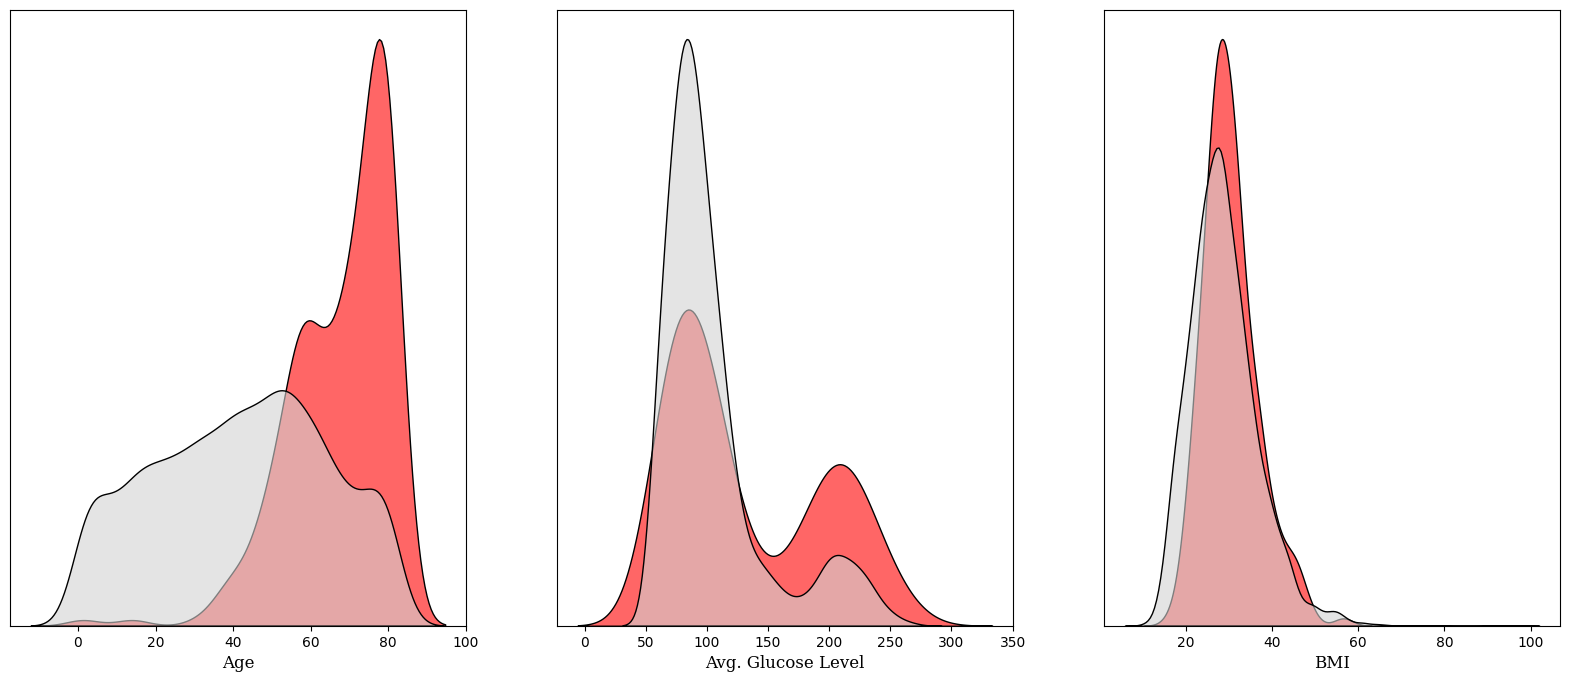

In [27]:
fig=plt.figure(figsize=(20,8),facecolor='white')
gs=fig.add_gridspec(1,3)
ax=[None for i in range(3)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[0,2])

ax[0].set_xlabel("Age",fontsize=12,fontfamily='serif')
ax[1].set_xlabel("Avg. Glucose Level",fontsize=12,fontfamily='serif')
ax[2].set_xlabel("BMI",fontsize=12,fontfamily='serif')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)

sns.kdeplot(x=strokes_df['age'],ax=ax[0],fill=True, color='red', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=strokes_df['avg_glucose_level'],ax=ax[1],fill=True, color='red', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=strokes_df['bmi'],ax=ax[2],fill=True, color='red', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=no_strokes_df['age'],ax=ax[0],fill=True, color='lightgrey', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=no_strokes_df['avg_glucose_level'],ax=ax[1],fill=True, color='lightgrey', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=no_strokes_df['bmi'],ax=ax[2],fill=True, color='lightgrey', alpha=0.6,zorder=3,edgecolor='black')
plt.show()

Step 02: Based on the result by plot, it can be notable that Age is the most important factor in terms of numerical factors. And we can guess the higher age, the higher risk of having stroke. So now we will explore deeper about age factor.

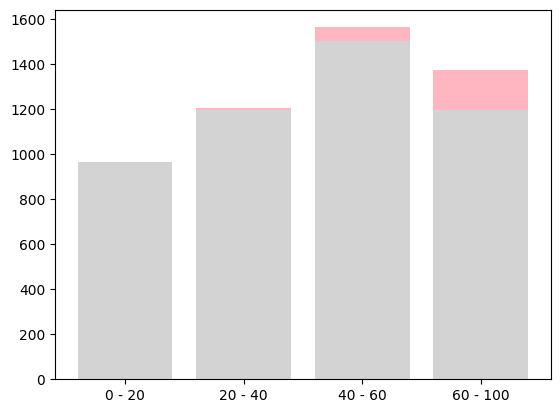

In [47]:
age_bins = [0, 20, 40, 60, 100]
stroke_ranges = {tuple(age_bins[i:i+2]): 0 for i in range(len(age_bins) - 1)}
no_strokes_ranges = {tuple(age_bins[i:i+2]): 0 for i in range(len(age_bins) - 1)}

for age in strokes_df["age"]:
    for i in range(len(age_bins) - 1):
        if age_bins[i] <= age < age_bins[i+1]:
            stroke_ranges[tuple(age_bins[i:i+2])] += 1

for age in no_strokes_df["age"]:
    for i in range(len(age_bins) - 1):
        if age_bins[i] <= age < age_bins[i+1]:
            no_strokes_ranges[tuple(age_bins[i:i+2])] += 1

stroke_bin_fre = [count for _, count in stroke_ranges.items()]
no_stroke_bin_fre = [count for _, count in no_strokes_ranges.items()]

ageLabel = ['0 - 20', '20 - 40', '40 - 60', '60 - 100']
plt.bar(ageLabel, no_stroke_bin_fre, color='lightgray')
plt.bar(ageLabel, stroke_bin_fre, bottom=no_stroke_bin_fre, color='lightpink')
plt.show()

Based on the result, we can find that age increase, the more likelihood to have a stroke

Step 03: